In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.

## Initial Time-Series Plotting

<AxesSubplot:xlabel='Date'>

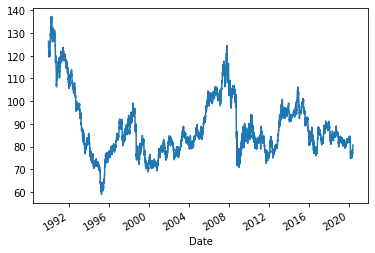

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot()

## Decomposition Using a Hodrick-Prescott Filter

In [5]:
import statsmodels.api as sm

In [6]:
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price']) 

In [7]:
ts_trend.to_frame()

,Price_trend
Date,
1990-01-02,125.850905
1990-01-03,125.679684
1990-01-04,125.508788
1990-01-05,125.338304
1990-01-08,125.167037
...,...
2020-05-29,78.793961
2020-06-01,79.051061
2020-06-02,79.311883


In [8]:
ts_noise.to_frame()

,Price_cycle
Date,
1990-01-02,0.519095
1990-01-03,-0.379684
1990-01-04,-2.048788
1990-01-05,-0.798304
1990-01-08,-0.897037
...,...
2020-05-29,-0.503961
2020-06-01,0.218939
2020-06-02,1.088117


In [9]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
Combineddf=cad_jpy_df['Price']
Combineddf

Date
1990-01-02    126.37
1990-01-03    125.30
1990-01-04    123.46
1990-01-05    124.54
1990-01-08    124.27
               ...  
2020-05-29     78.29
2020-06-01     79.27
2020-06-02     80.40
2020-06-03     80.70
2020-06-04     80.71
Name: Price, Length: 7929, dtype: float64

In [10]:
dfnoise=pd.merge(Combineddf,ts_noise,how='inner', left_on=Combineddf.index, right_on= ts_noise.index)
dfnoise

,key_0,Price,Price_cycle
0,1990-01-02,126.37,0.519095
1,1990-01-03,125.30,-0.379684
2,1990-01-04,123.46,-2.048788
3,1990-01-05,124.54,-0.798304
4,1990-01-08,124.27,-0.897037
...,...,...,...
7924,2020-05-29,78.29,-0.503961
7925,2020-06-01,79.27,0.218939
7926,2020-06-02,80.40,1.088117
7927,2020-06-03,80.70,1.125501


In [11]:
dfnoise=dfnoise.set_index(['key_0'])
dfnoise.index.names = ['Date']

In [12]:
dfnoise

,Price,Price_cycle
Date,,
1990-01-02,126.37,0.519095
1990-01-03,125.30,-0.379684
1990-01-04,123.46,-2.048788
1990-01-05,124.54,-0.798304
1990-01-08,124.27,-0.897037
...,...,...
2020-05-29,78.29,-0.503961
2020-06-01,79.27,0.218939
2020-06-02,80.40,1.088117


In [13]:
dfnoise.rename(columns={"Price_cycle":"Noise"},inplace=True)
dfnoise

,Price,Noise
Date,,
1990-01-02,126.37,0.519095
1990-01-03,125.30,-0.379684
1990-01-04,123.46,-2.048788
1990-01-05,124.54,-0.798304
1990-01-08,124.27,-0.897037
...,...,...
2020-05-29,78.29,-0.503961
2020-06-01,79.27,0.218939
2020-06-02,80.40,1.088117


In [14]:
totaldf=pd.merge(dfnoise,ts_trend,how='inner', left_on=dfnoise.index, right_on= ts_trend.index)
totaldf

,key_0,Price,Noise,Price_trend
0,1990-01-02,126.37,0.519095,125.850905
1,1990-01-03,125.30,-0.379684,125.679684
2,1990-01-04,123.46,-2.048788,125.508788
3,1990-01-05,124.54,-0.798304,125.338304
4,1990-01-08,124.27,-0.897037,125.167037
...,...,...,...,...
7924,2020-05-29,78.29,-0.503961,78.793961
7925,2020-06-01,79.27,0.218939,79.051061
7926,2020-06-02,80.40,1.088117,79.311883
7927,2020-06-03,80.70,1.125501,79.574499


In [15]:
totaldf=totaldf.set_index(['key_0'])
totaldf.index.names = ['Date']

In [16]:
totaldf.rename(columns={"Price_trend":"Trend"},inplace=True)
totaldf

,Price,Noise,Trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037
...,...,...,...
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883


In [17]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
exchtrend=totaldf.loc['2015':]
exchtrend

,Price,Noise,Trend
Date,,,
2015-01-01,103.12,1.523927,101.596073
2015-01-02,102.25,0.945717,101.304283
2015-01-05,101.70,0.708200,100.991800
2015-01-06,100.04,-0.620865,100.660865
2015-01-07,100.93,0.615839,100.314161
...,...,...,...
2020-05-29,78.29,-0.503961,78.793961
2020-06-01,79.27,0.218939,79.051061
2020-06-02,80.40,1.088117,79.311883


In [18]:
exchtrend.drop(columns=['Noise'], inplace=True)
exchtrend

,Price,Trend
Date,,
2015-01-01,103.12,101.596073
2015-01-02,102.25,101.304283
2015-01-05,101.70,100.991800
2015-01-06,100.04,100.660865
2015-01-07,100.93,100.314161
...,...,...
2020-05-29,78.29,78.793961
2020-06-01,79.27,79.051061
2020-06-02,80.40,79.311883


<AxesSubplot:title={'center':'Price vs. Trend'}, xlabel='Date'>

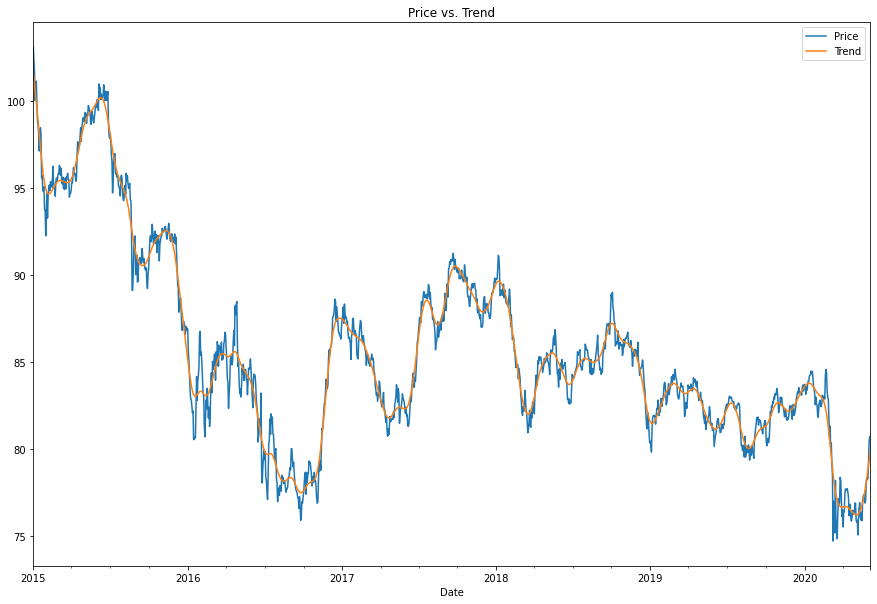

In [19]:
exchtrend.plot(figsize=(15,10), title='Price vs. Trend', xlabel='Date')

<AxesSubplot:xlabel='Date'>

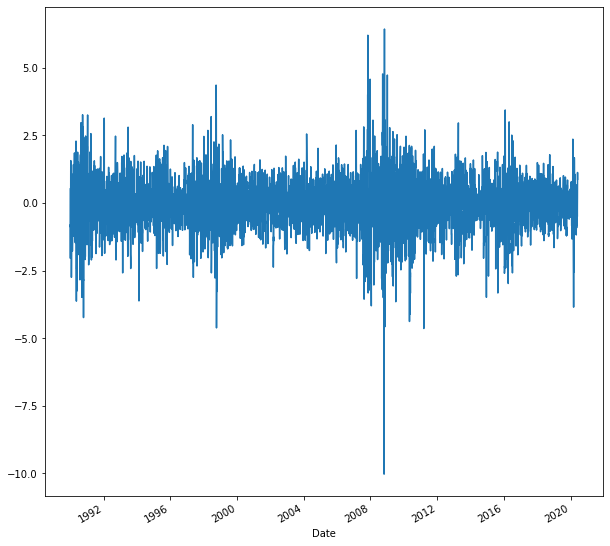

In [20]:
# Plot the Settle Noise
totaldf.Noise.plot(figsize=(10,10))

## Forecasting Returns using an ARMA Model

In [21]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [22]:
import statsmodels.api as sm

In [23]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))

from statsmodels.tsa.arima_model import ARMA
arma=ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
armaresults = arma.fit() 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23010D+00    |proj g|=  3.45568D-04

At iterate    5    f=  1.23010D+00    |proj g|=  3.60378D-05

At iterate   10    f=  1.23010D+00    |proj g|=  3.51208D-04


 This problem is unconstrained.



At iterate   15    f=  1.23008D+00    |proj g|=  2.32743D-03

At iterate   20    f=  1.23007D+00    |proj g|=  2.26485D-05

At iterate   25    f=  1.23007D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   2.220D-08   1.230D+00
  F =   1.2300678291595069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [24]:
armaresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sun, 01 May 2022   AIC                          19513.955
Time:                        13:59:07   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1698           +0.0000j           42.1698            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Return Forecast'}>

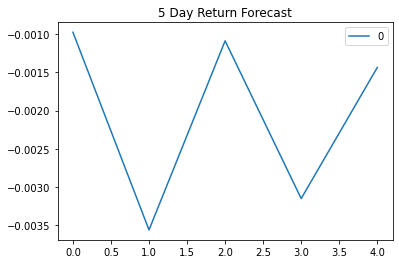

In [25]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(armaresults.forecast(steps=5)[0]).plot(title="5 Day Return Forecast") 

## Forecasting the Exchange Rate Price using an ARIMA Model

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
arimamodel = ARIMA(cad_jpy_df['Price'], order=(5, 1, 1)) 
# Fit the model
arimaresults = arimamodel.fit() 

/Users/amiraali/opt/anaconda3/envs/pyvizenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amiraali/opt/anaconda3/envs/pyvizenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10313D+00    |proj g|=  1.93001D-04

At iterate    5    f=  1.10313D+00    |proj g|=  5.79536D-06

At iterate   10    f=  1.10313D+00    |proj g|=  3.35287D-05

At iterate   15    f=  1.10313D+00    |proj g|=  4.83391D-05

At iterate   20    f=  1.10313D+00    |proj g|=  4.88498D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     34      1     0     0   8.882D-08   1.103D+00
  F =   1.1031309576186830     

CONVERG

In [28]:
arimaresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Sun, 01 May 2022   AIC                          17507.244
Time:                        13:59:16   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.855      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7703j            1.9266           -0.0655
AR.2            1.7660           +0.7703j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1894           +0.0000j            2.1894            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Price Forecast'}>

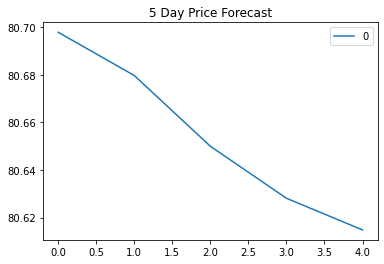

In [29]:
# Plot the 5 Day Price Forecast
pd.DataFrame(arimaresults.forecast(steps=5)[0]).plot(title="5 Day Price Forecast") 

## Volatility Forecasting with GARCH

In [30]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [31]:
from arch import arch_model

In [32]:
# Estimate a GARCH model:
garchmodel = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1) 
# Fit the model
res = garchmodel.fit(disp="on") 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 306850859.3384427
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838861417698
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11771.663036006626
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.31072801688
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.369930732108
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.112105819691
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027322298947
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.022077988246
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021067661106
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020797453917
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764880363
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.020764882265


In [33]:
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sun, May 01 2022   Df Residuals:                     7928
Time:                        13:59:24   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [34]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [35]:
 # Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
garchforecast=res.forecast(start=last_day,horizon=forecast_horizon)

In [36]:
# Annualize the forecast
intermediate = np.sqrt(garchforecast.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [37]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

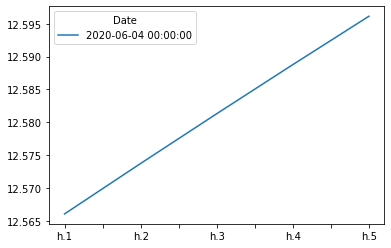

In [38]:
# Plot the final forecast
final.plot()